In [1]:
library(ggseqlogo)
library(ggplot2)
library(patchwork)

In [2]:
read_nptxt_matrix <- function(fname) {
    d=read.table(fname)
    colnames(d) = c("A", "C", "G", "T")
    t(d)
}

In [3]:
revcomp <- function(x) {
    x = x[rev(seq(nrow(x))), rev(seq(ncol(x)))]
    rownames(x) = c("A", "C", "G", "T")
    x
}

In [4]:
trim_and_plot <- function(m, rc=F, trim_left=0, trim_right=0, method='bits', ymin=0, ymax=2, title=NULL) {
    if (rc) {
        m = revcomp(m)                
    }

    #m = m[, trim_left:(ncol(m)-trim_right)]
    #m

    rownames(m) = c("A","C","G","T")
    
    
    f="helvetica_bold"
    
    p <- ggseqlogo(m, method=method, font=f, ncol=1, size=12) + 
                                    ylim(c(ymin,ymax)) +
                                    theme_void() 

    
    if (!is.null(title)) {
        p = p 
        p = p + ggtitle(title)
        p = p + theme(plot.title = element_text(hjust = 0.5, size=20))
        #p = p + theme(plot.title = element_text(hjust = 0.5, size=20))
    }
    
    p
}

In [5]:
get_plots <- function(subcluster_base_path, input_ls, annotations, ymax, rc=F, trim_left=0, trim_right=0, first_yaxis=F) {
    transient_plots = list()
    num_instances_per_motif = 5
    i = 1
    print("new")
    for (x in input_ls) {

        submotif = read_nptxt_matrix(sprintf(subcluster_base_path, x))

        #print(submotif)
        print(max(submotif))
 
        textn = annotations[annotations["key"]==sprintf("0_%d",x)][2]
        transient_plots[[i]] = trim_and_plot(submotif, rc, trim_left, trim_right, method='custom',
                                         ymin=-0.01, ymax=ymax, title=textn)

        #transient_plots[[i]] = trim_and_plot(submotif, rc, trim_left, trim_right)

        transient_plots[[i]] = transient_plots[[i]]  
                                    #annotate('text', 
                                    #         x=ncol(submotif), 
                                    #         y=max(submotif), 
                                    #         size=5,
                                    #         label=sprintf("%.2f",as.numeric(textn))
                                    #         )
        theme(plot.margin = unit(c(20,0,0,0), "pt"))
        transient_plots[[i]]


        i = i +1
        }
        
        
    transient_plots

}

In [6]:
get_plots1 <- function(subcluster_base_path, input_ls, annotations, ymax, ymaxn, rc=F, trim_left=0, trim_right=0, first_yaxis=F) {
    transient_plots = list()
    num_instances_per_motif = 5
    i = 1
    print("new")
    for (x in input_ls) {

        submotif = read_nptxt_matrix(sprintf(subcluster_base_path, x))

        #print(submotif)
        print(max(submotif))
        
        if (max(submotif)>(ymaxn)){
            ymax1=ymax}
        else{
            ymax1=ymaxn}
 
        textn = annotations[annotations["key"]==sprintf("0_%d",x)][2]
        transient_plots[[i]] = trim_and_plot(submotif, rc, trim_left, trim_right, method='custom',
                                         ymin=-0.01, ymax=ymax1, title=textn)

        #transient_plots[[i]] = trim_and_plot(submotif, rc, trim_left, trim_right)

        transient_plots[[i]] = transient_plots[[i]]  
                                    #annotate('text', 
                                    #         x=ncol(submotif), 
                                    #         y=max(submotif), 
                                    #         size=5,
                                    #         label=sprintf("%.2f",as.numeric(textn))
                                    #         )
        theme(plot.margin = unit(c(20,0,0,0), "pt"))
        transient_plots[[i]]


        i = i +1
        }
        
        
    transient_plots

}

[1] "new"
[1] 0.05842
[1] 0.056638
[1] 0.04011
[1] 0.029255
[1] 0.043397
[1] 0.065572
[1] 0.039104
[1] 0.043152
[1] 0.045231
[1] 0.039256
[1] "new"
[1] 0.076104
[1] 0.080554
[1] 0.065065
[1] 0.059854
[1] 0.056512
[1] 0.073508
[1] 0.091924
[1] 0.060287
[1] 0.039794
[1] 0.053802
[1] "new"
[1] 0.057684
[1] 0.049384
[1] 0.028753
[1] 0.042114
[1] 0.034972
[1] 0.032971
[1] 0.051625
[1] 0.030278
[1] 0.034526
[1] 0.033947
[1] "new"
[1] 0.0801
[1] 0.05945
[1] 0.048507
[1] 0.037939
[1] 0.051162
[1] 0.038201
[1] 0.036564
[1] 0.040199
[1] 0.047486
[1] 0.049345
[1] "new"
[1] 0.10478
[1] 0.106406
[1] 0.070799
[1] 0.066876
[1] 0.069023
[1] 0.055212
[1] 0.048426
[1] 0.067787
[1] 0.06564
[1] 0.059143


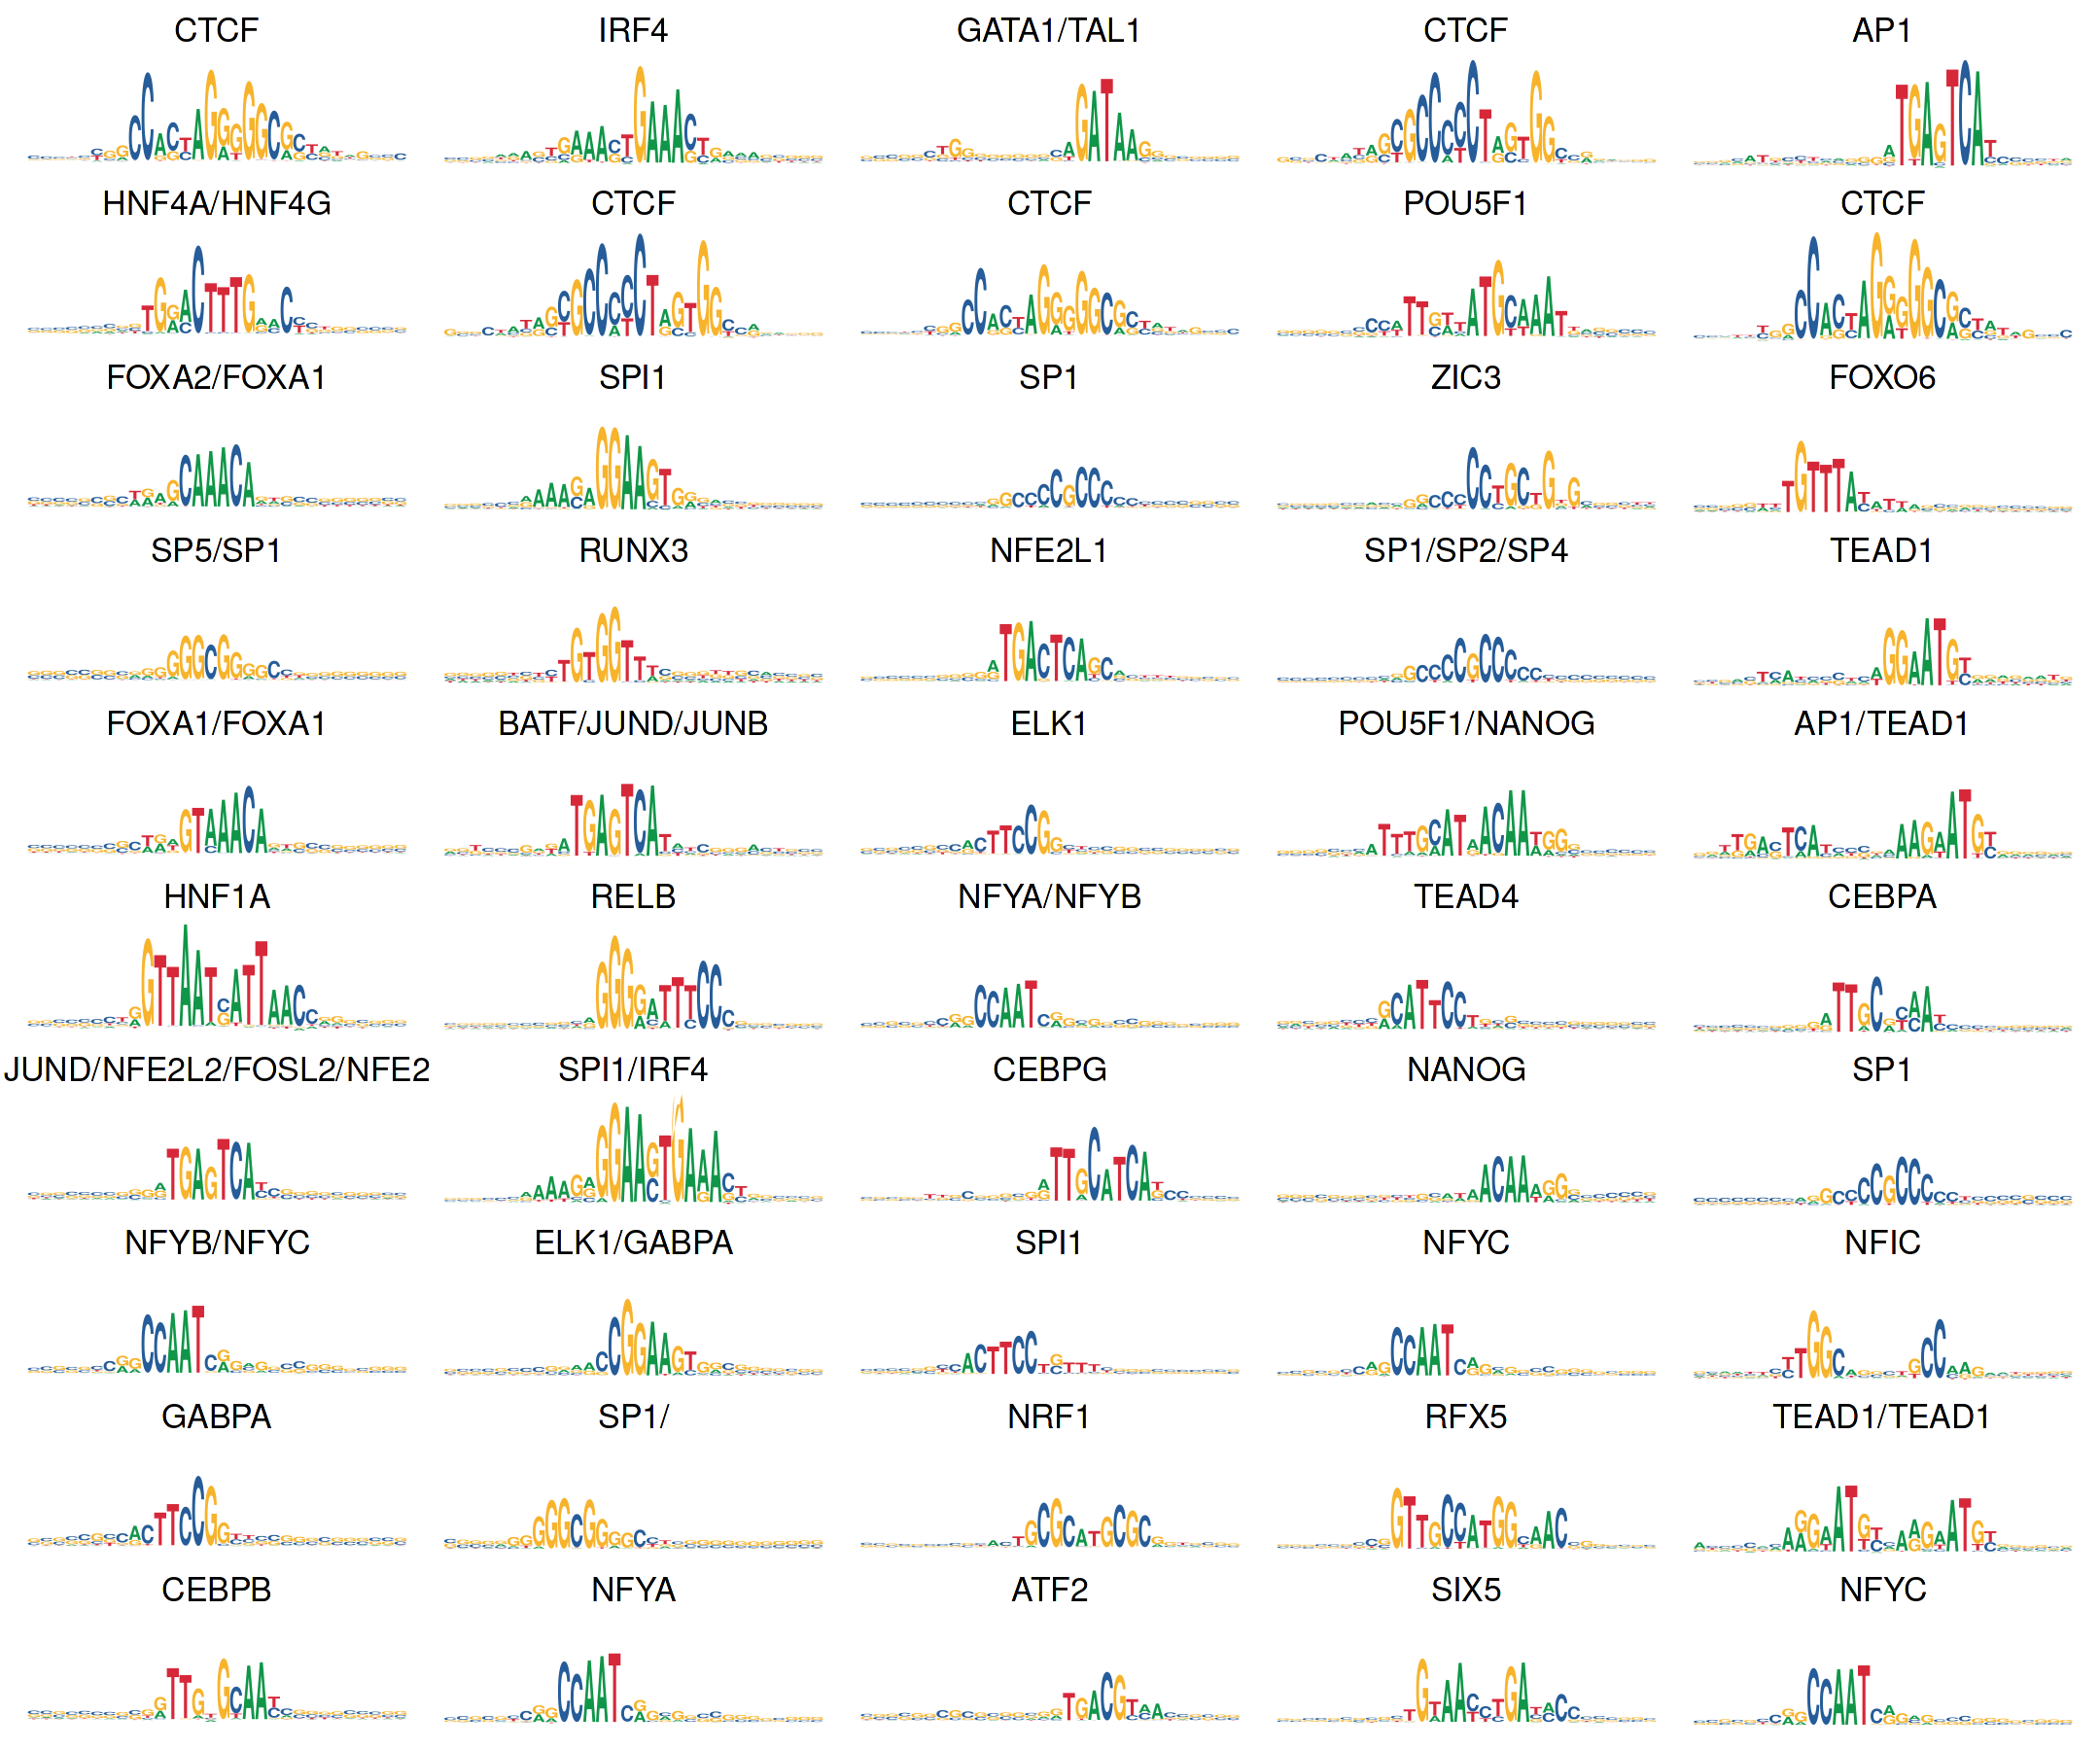

In [8]:

options(repr.plot.width = 18, repr.plot.height = 15)

atac_annotations = read.table("../oct_24_2024/ATAC/HEPG2/counts_annotations.tsv",sep=",", header=FALSE)

colnames(atac_annotations) = c("key","label")

all_plots = get_plots("../oct_24_2024/ATAC/HEPG2/counts_0_%d.pfm", seq(0,9), atac_annotations,
                       rc=F, trim_left=0, trim_right=0, first_yaxis = F, ymax=0.068323)

atac_annotations = read.table("../oct_24_2024/ATAC/GM12878/counts_annotations.tsv",sep=",", header=FALSE)

colnames(atac_annotations) = c("key","label")

all_plots1 = get_plots("../oct_24_2024/ATAC/GM12878/counts_0_%d.pfm", seq(0,9), atac_annotations,
                       rc=F, trim_left=0, trim_right=0, first_yaxis = F, ymax=0.085323)

atac_annotations = read.table("../oct_24_2024/ATAC/K562/counts_annotations.tsv",sep=",", header=FALSE)

colnames(atac_annotations) = c("key","label")

all_plots2 = get_plots("../oct_24_2024/ATAC/K562/counts_0_%d.pfm", seq(0,9), atac_annotations,
                       rc=F, trim_left=0, trim_right=0, first_yaxis = F,ymax=0.075)

atac_annotations = read.table("../oct_24_2024/ATAC/H1ESC/counts_annotations.tsv",sep=",", header=FALSE)

colnames(atac_annotations) = c("key","label")

all_plots3 = get_plots("../oct_24_2024/ATAC/H1ESC/counts_0_%d.pfm", seq(0,9), atac_annotations,
                       rc=F, trim_left=0, trim_right=0, first_yaxis = F, ymax=0.084564)


atac_annotations = read.table("../oct_24_2024/ATAC/IMR90/counts_annotations.tsv",sep=",", header=FALSE)

colnames(atac_annotations) = c("key","label")

all_plots4 = get_plots("../oct_24_2024/ATAC/IMR90/counts_0_%d.pfm", seq(0,9), atac_annotations,
                       rc=F, trim_left=0, trim_right=0, first_yaxis = F,ymax=0.111)

#do.call(gridExtra::grid.arrange, c(all_plots, ncol=1))

wrap_plots(append(append(append(append(all_plots, all_plots1), all_plots2), all_plots3), all_plots4), nrow=10, byrow=FALSE)

ggsave("subfigs/compare_top_10_modisco_counts_oct_24_2024.pdf", device = "pdf",  width = 18, height = 15, dpi = 300)


[1] "new"
[1] 0.020798
[1] 0.005185
[1] 0.003216
[1] 0.00399
[1] 0.004424
[1] 0.006103
[1] 0.004184
[1] 0.006975
[1] 0.00358
[1] 0.004717
[1] "new"
[1] 0.035458
[1] 0.009131
[1] 0.006504
[1] 0.006287
[1] 0.005524
[1] 0.007101
[1] 0.008502
[1] 0.010525
[1] 0.007934
[1] 0.006681
[1] "new"
[1] 0.027843
[1] 0.005062
[1] 0.005767
[1] 0.006653
[1] 0.007175
[1] 0.004842
[1] 0.004545
[1] 0.001021
[1] 0.006229
[1] 0.004682
[1] "new"
[1] 0.019743
[1] 0.007579
[1] 0.004985
[1] 0.005187
[1] 0.004783
[1] 0.004992
[1] 0.007434
[1] 0.006563
[1] 0.006489
[1] 0.006791
[1] "new"
[1] 0.011894
[1] 0.030643
[1] 0.007003
[1] 0.007224
[1] 0.005875
[1] 0.008254
[1] 0.008337
[1] 0.006387
[1] 0.006186
[1] 0.00736


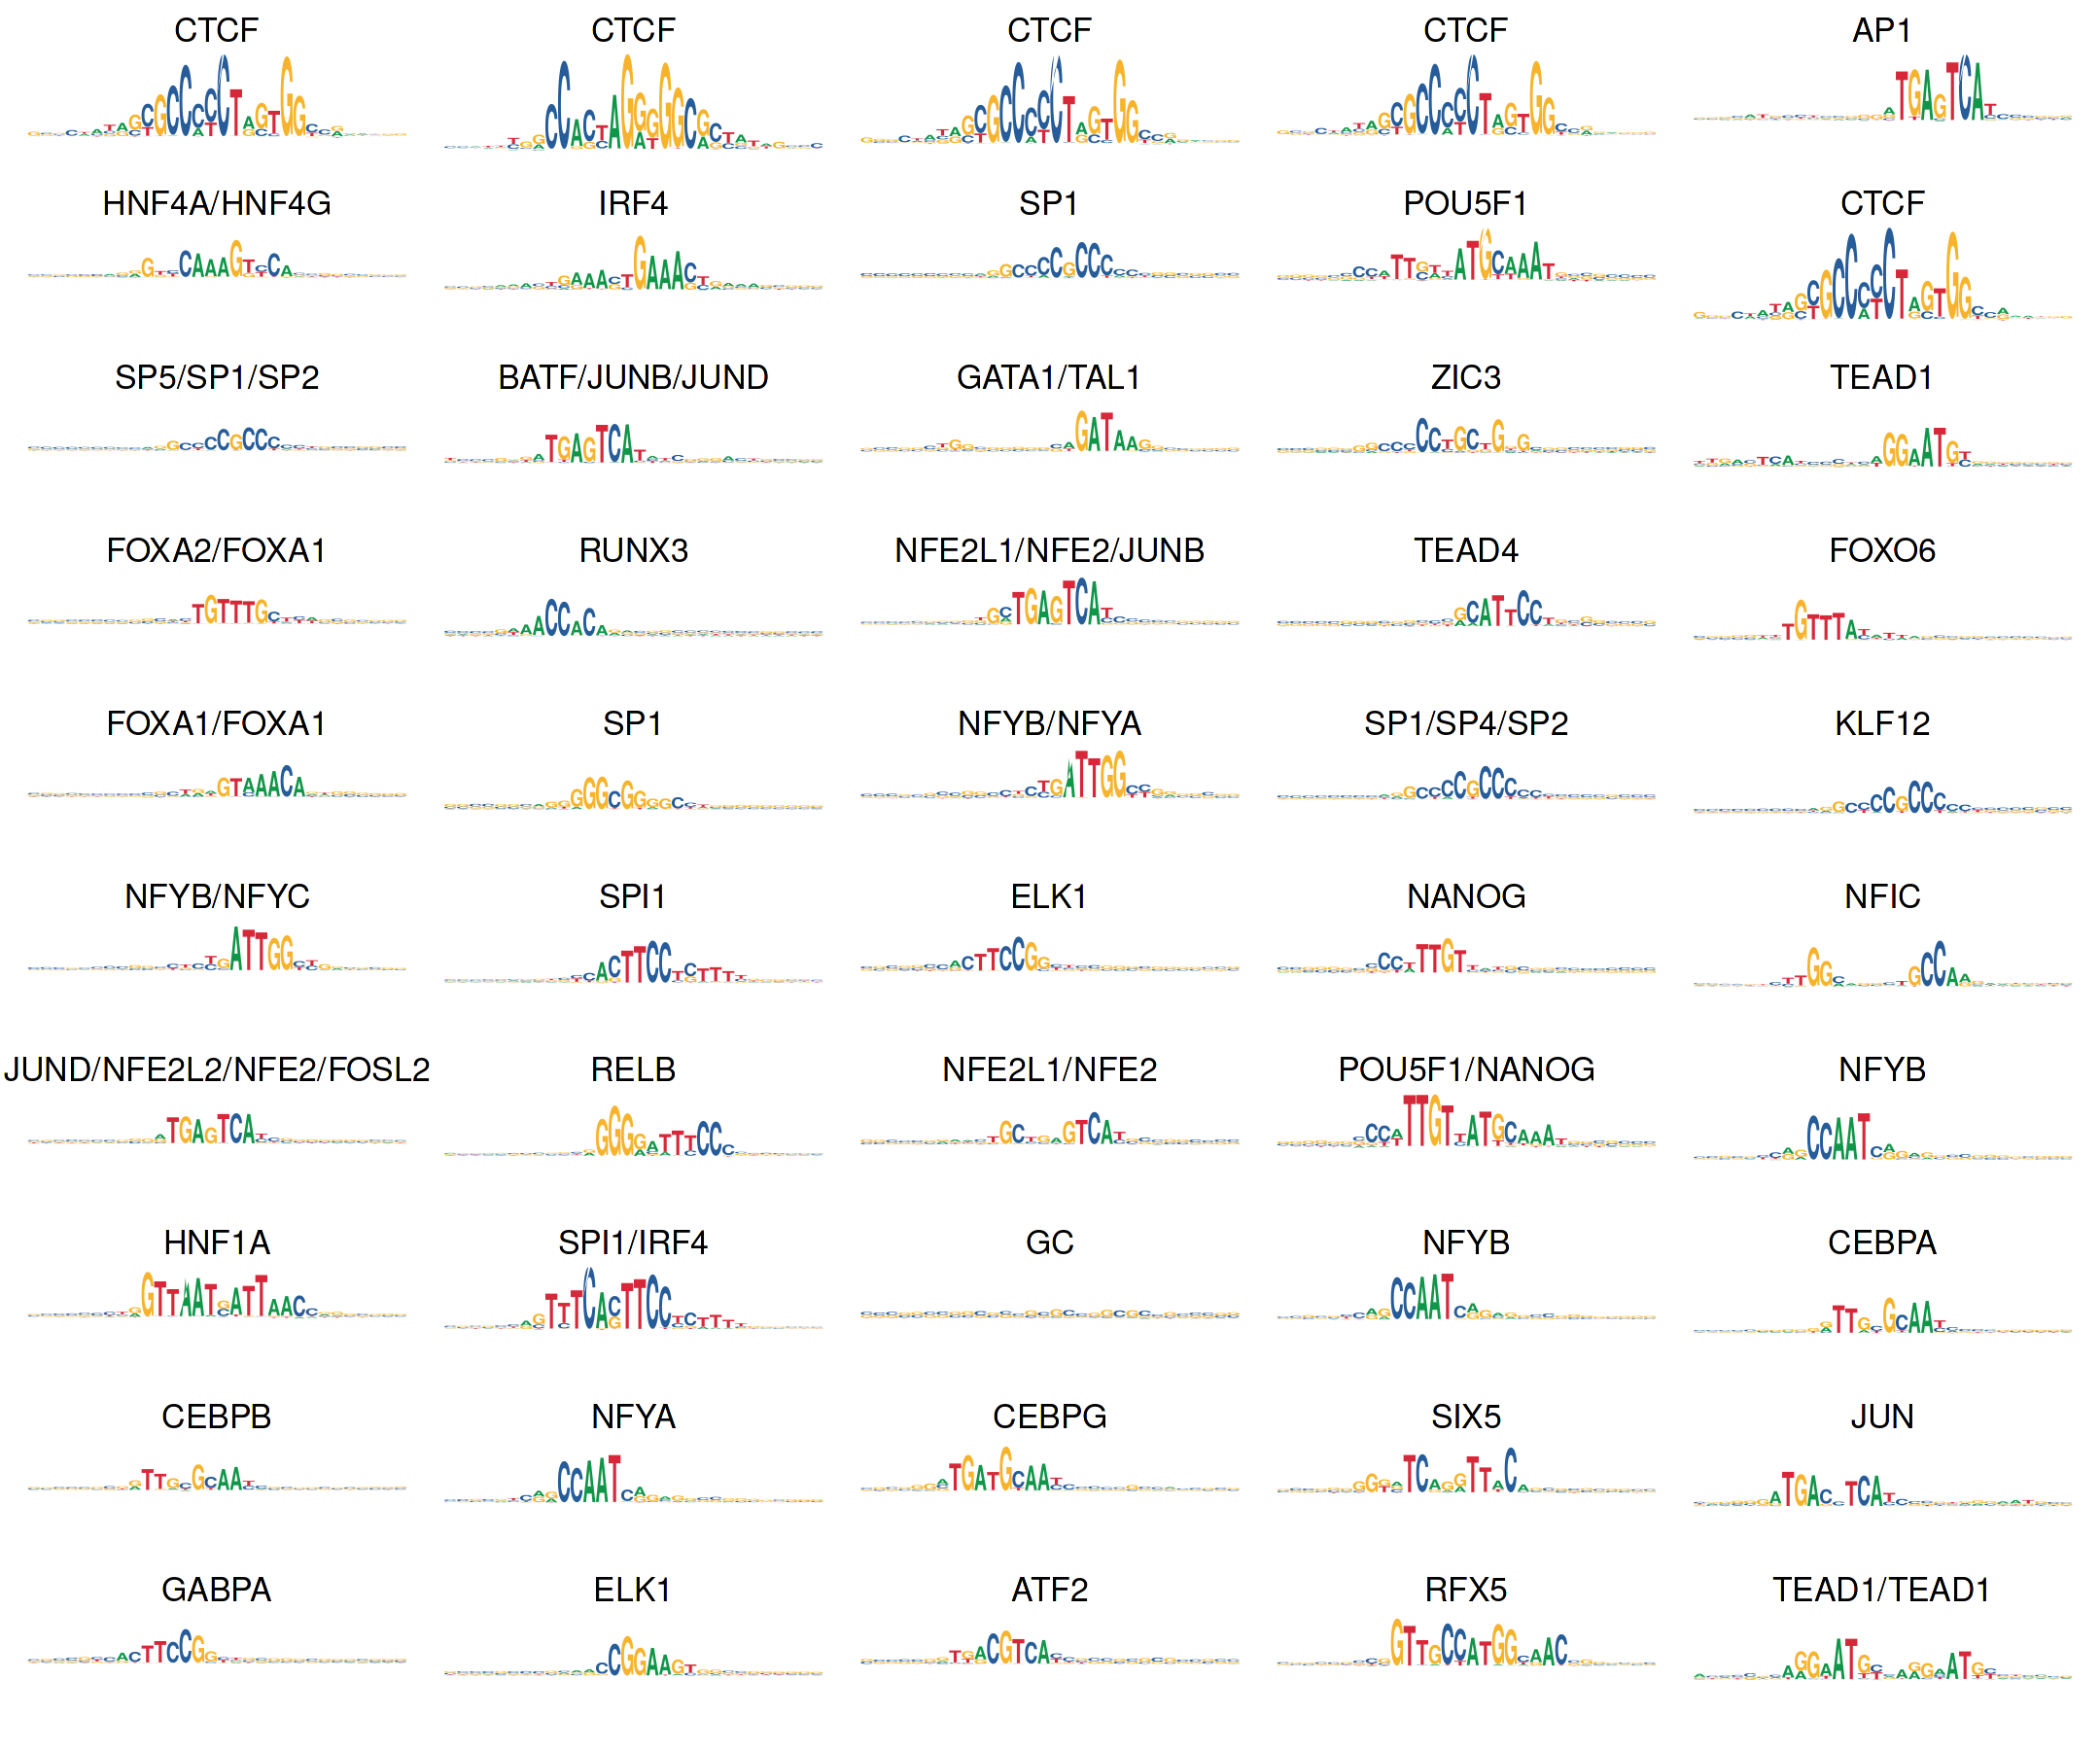

In [9]:

options(repr.plot.width = 18, repr.plot.height = 15)

atac_annotations = read.table("../oct_24_2024/ATAC/HEPG2/profile_annotations.tsv",sep=",", header=FALSE)

colnames(atac_annotations) = c("key","label")

all_plots = get_plots1("../oct_24_2024/ATAC/HEPG2/profile_0_%d.pfm", seq(0,9), atac_annotations,
                       rc=F, trim_left=0, trim_right=0, first_yaxis = F, ymax=0.020798, ymaxn=0.006975)

atac_annotations = read.table("../oct_24_2024/ATAC/GM12878/profile_annotations.tsv",sep=",", header=FALSE)

colnames(atac_annotations) = c("key","label")

all_plots1 = get_plots1("../oct_24_2024/ATAC/GM12878/profile_0_%d.pfm", seq(0,9), atac_annotations,
                       rc=F, trim_left=0, trim_right=0, first_yaxis = F, ymax=0.035458, ymaxn=0.010525)

atac_annotations = read.table("../oct_24_2024/ATAC/K562/profile_annotations.tsv",sep=",", header=FALSE)

colnames(atac_annotations) = c("key","label")

all_plots2 = get_plots1("../oct_24_2024/ATAC/K562/profile_0_%d.pfm", seq(0,9), atac_annotations,
                       rc=F, trim_left=0, trim_right=0, first_yaxis = F,ymax=0.027318, ymaxn=0.007177)

atac_annotations = read.table("../oct_24_2024/ATAC/H1ESC/profile_annotations.tsv",sep=",", header=FALSE)

colnames(atac_annotations) = c("key","label")

all_plots3 = get_plots1("../oct_24_2024/ATAC/H1ESC/profile_0_%d.pfm", seq(0,9), atac_annotations,
                       rc=F, trim_left=0, trim_right=0, first_yaxis = F, ymax=0.019743, ymaxn=0.007579)


atac_annotations = read.table("../oct_24_2024/ATAC/IMR90/profile_annotations.tsv",sep=",", header=FALSE)

colnames(atac_annotations) = c("key","label")

all_plots4 = get_plots1("../oct_24_2024/ATAC/IMR90/profile_0_%d.pfm", seq(0,9), atac_annotations,
                       rc=F, trim_left=0, trim_right=0, first_yaxis = F,ymax=0.030718, ymaxn=0.01191)

#do.call(gridExtra::grid.arrange, c(all_plots, ncol=1))

wrap_plots(append(append(append(append(all_plots, all_plots1), all_plots2), all_plots3), all_plots4), nrow=10, byrow=FALSE)

ggsave("subfigs/compare_top_10_modisco_profile_oct_24_2024.pdf", device = "pdf",  width = 18, height = 15, dpi = 300)
